In [67]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score,confusion_matrix, classification_report


In [68]:
stroke_df = pd.read_csv(Path("./Data/healthcare-dataset-stroke-data.csv"))

Step 1: Data Understanding, Cleaning and Pre-processing


In [69]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
stroke_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [71]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [72]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Figure size 1000x600 with 0 Axes>

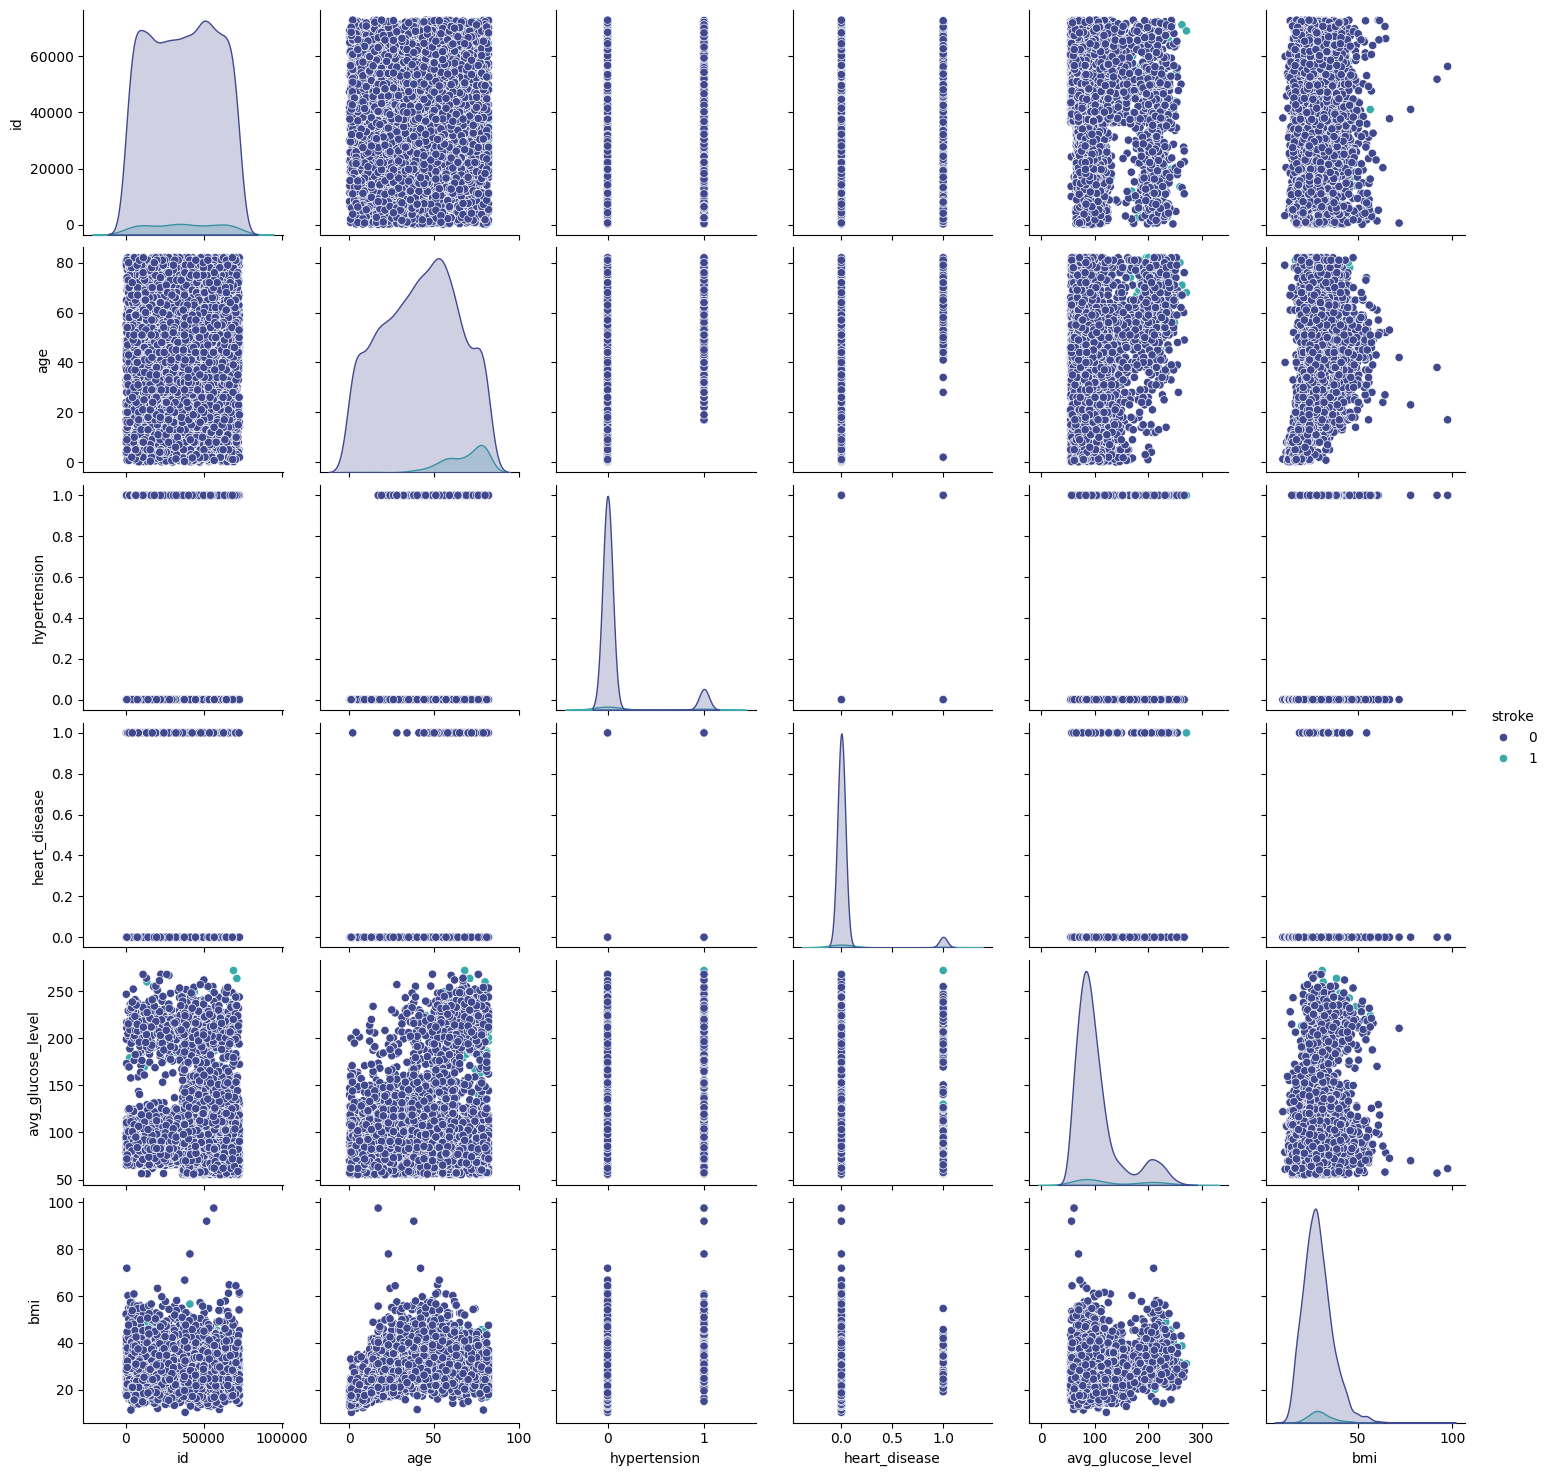

In [73]:
# For Visualization Set the size of the figure(pair plot)
plt.figure(figsize=(10,6))
sns.pairplot(stroke_df,hue='stroke',palette='mako')

In [74]:
unknown_count = len(stroke_df[stroke_df['smoking_status'] == 'Unknown'])


In [75]:
unknown_count

1544

<Axes: >

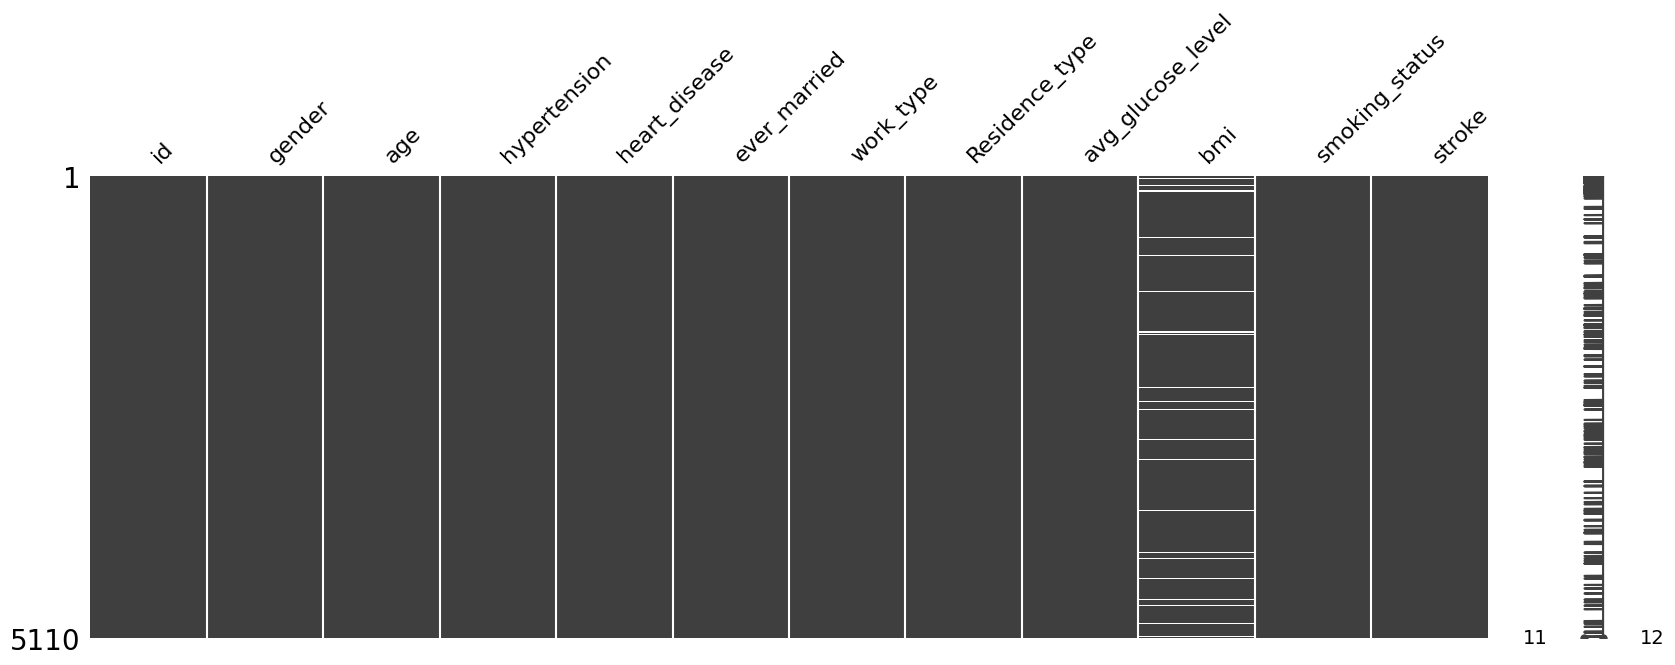

In [76]:
mno.matrix(stroke_df, figsize = (20, 6))

<Axes: xlabel='age', ylabel='Count'>

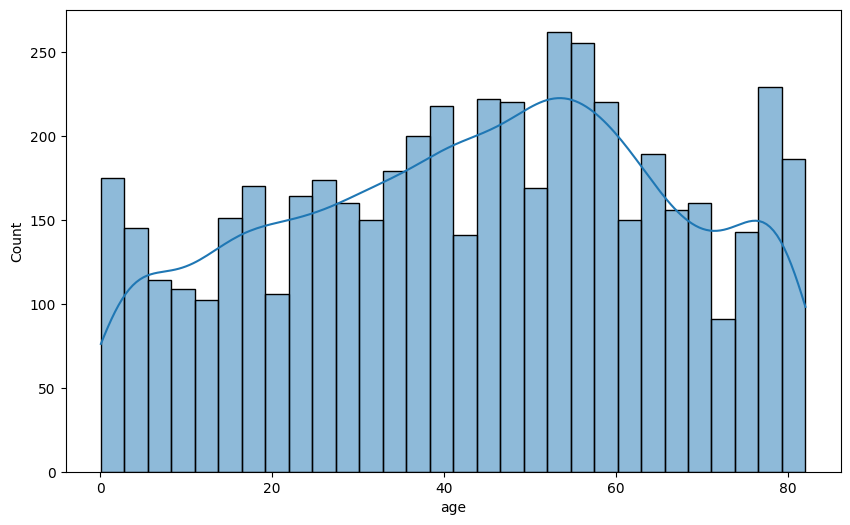

In [77]:
# Create a histogram of the 'age' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.histplot(stroke_df.age,kde=True,bins=30)

([<matplotlib.patches.Wedge at 0x1b51c7898d0>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

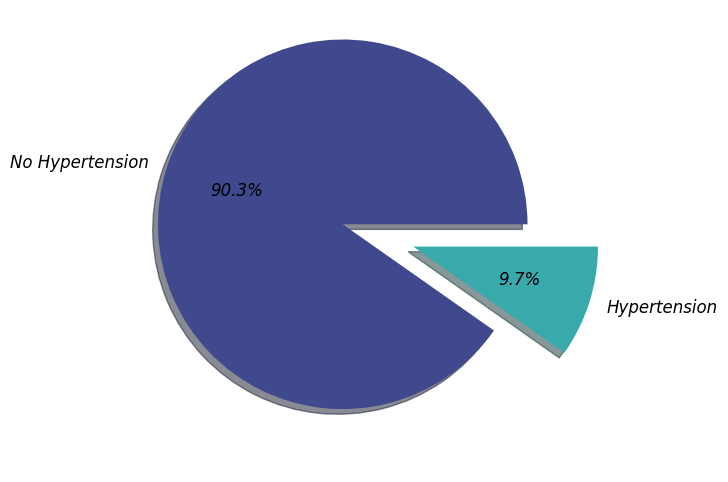

In [78]:
# Create a pie chart to visualize the distribution of hypertension
plt.figure(figsize=(10,6))
plt.pie(stroke_df.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

([<matplotlib.patches.Wedge at 0x1b51c7d2850>,
 [Text(-1.3798936980729009, 0.23641781239723444, 'No Heart disease'),
  Text(1.182766015061574, -0.2026439084092213, 'Heart disease')],
 [Text(-0.8870745201897219, 0.1519828793982221, '94.6%'),
  Text(0.6899468421192514, -0.11820894657204575, '5.4%')])

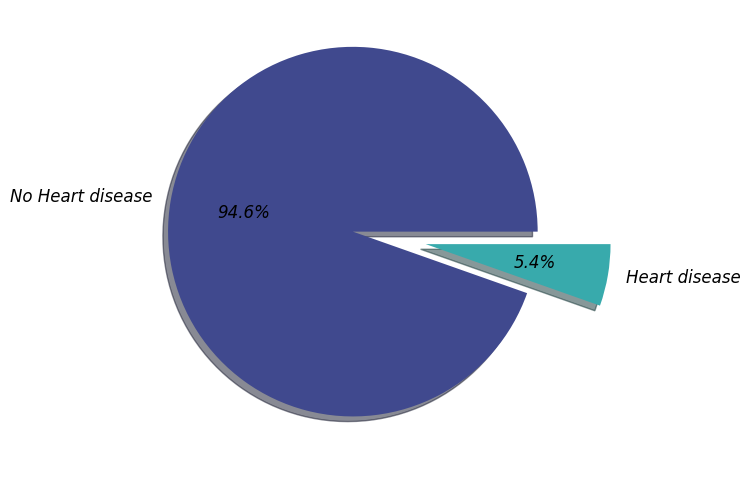

In [79]:
# Create a pie chart to visualize the distribution of heart disease
plt.figure(figsize=(10,6))
plt.pie(stroke_df.heart_disease.value_counts(),labels=['No Heart disease','Heart disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

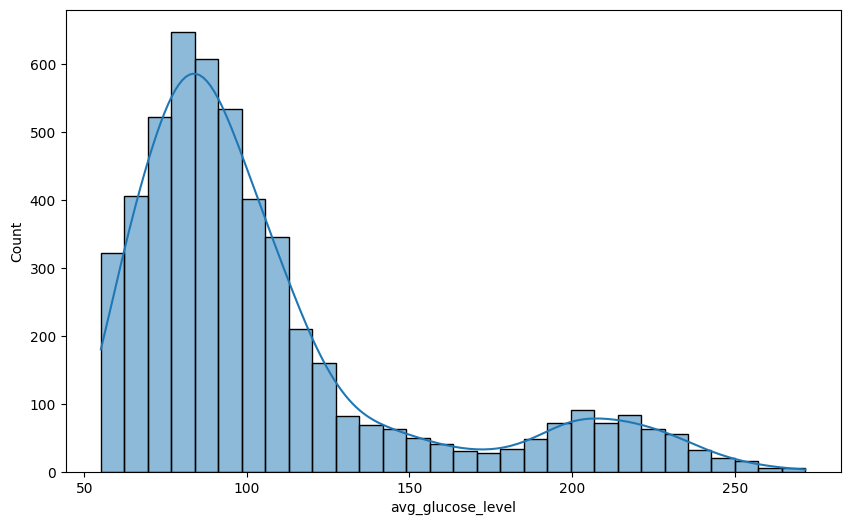

In [80]:
# Create a histogram of the 'avg_glucose_level' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.histplot(stroke_df.avg_glucose_level,kde=True,bins=30)

<Axes: ylabel='bmi'>

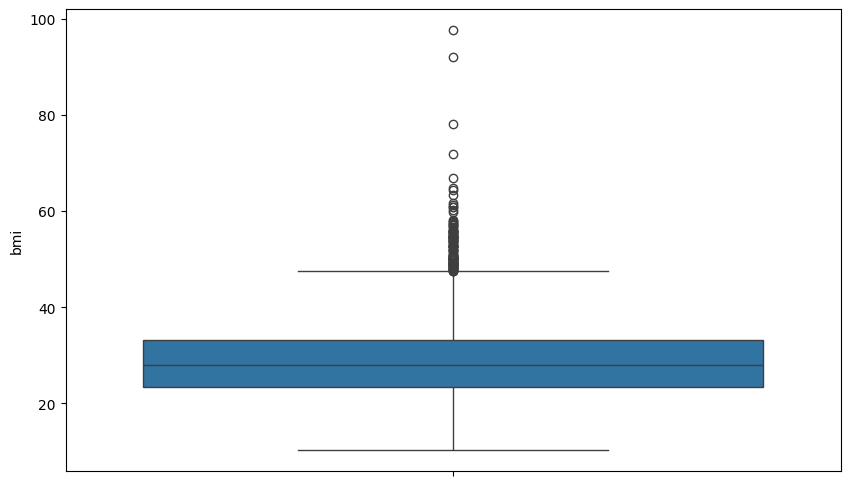

In [81]:
# Create a boxplot of the 'bmi' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(stroke_df.bmi)

In [130]:
# Remove rows where gender is 'Other' from the DataFrame 'data'
stroke_df.drop(stroke_df[stroke_df.gender == 'Other'].index,inplace=True)

# Reset the index of the DataFrame 'data' after removing rows
stroke_df.reset_index(drop=True,inplace=True)

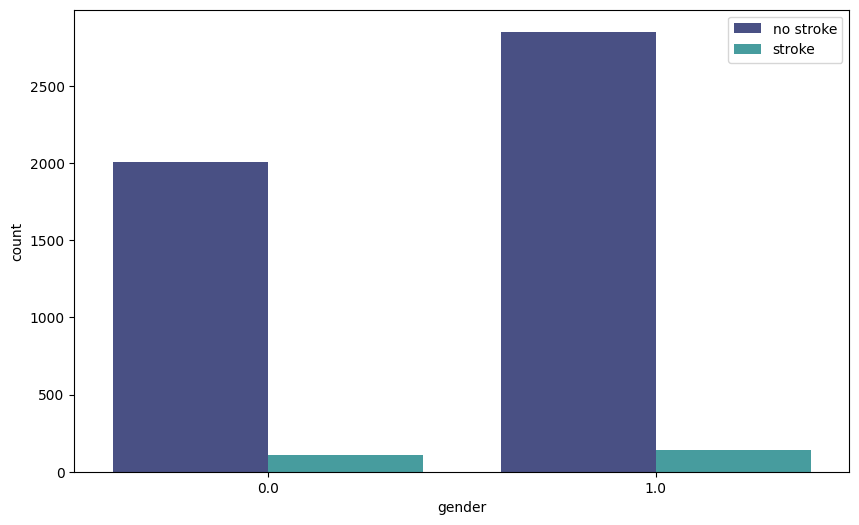

In [131]:
# Create a count plot of the 'gender' column in the DataFrame 'data'

plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=stroke_df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

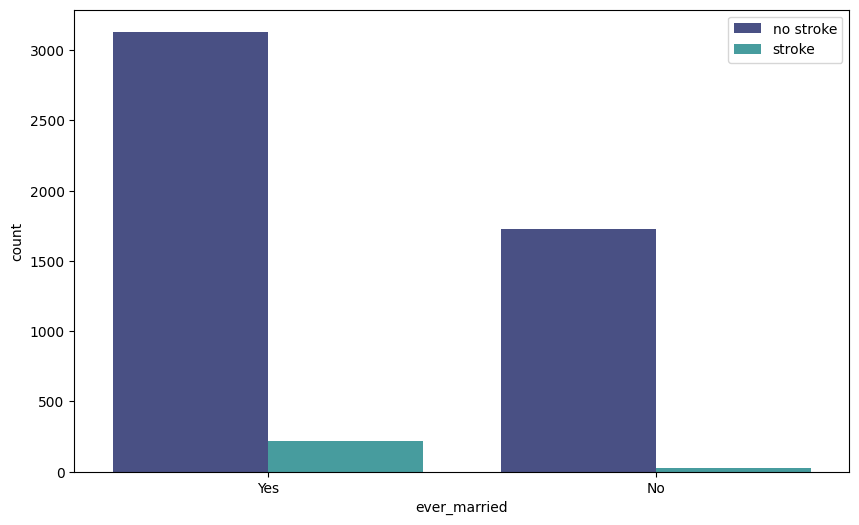

In [129]:
# Create a count plot of the 'ever_married' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=stroke_df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

[Text(0.5, 1.0, 'Data Distribution w.r.t. Stroke Outcome: Smoking Status')]

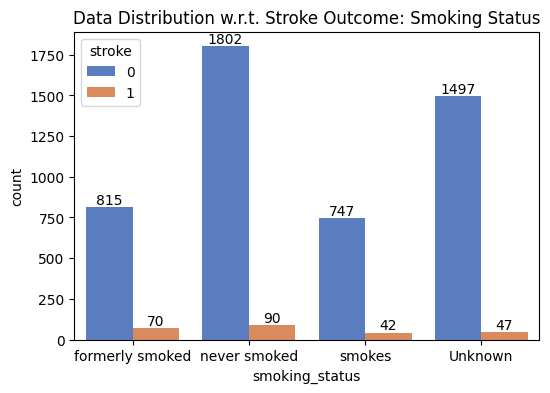

In [82]:
plt.figure(figsize=(6,4))
smoking_visual = sns.countplot(x = 'smoking_status', hue ='stroke', data = stroke_df, palette='muted')
for container in smoking_visual.containers:
    smoking_visual.bar_label(container)
smoking_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Smoking Status")

<Axes: ylabel='age'>

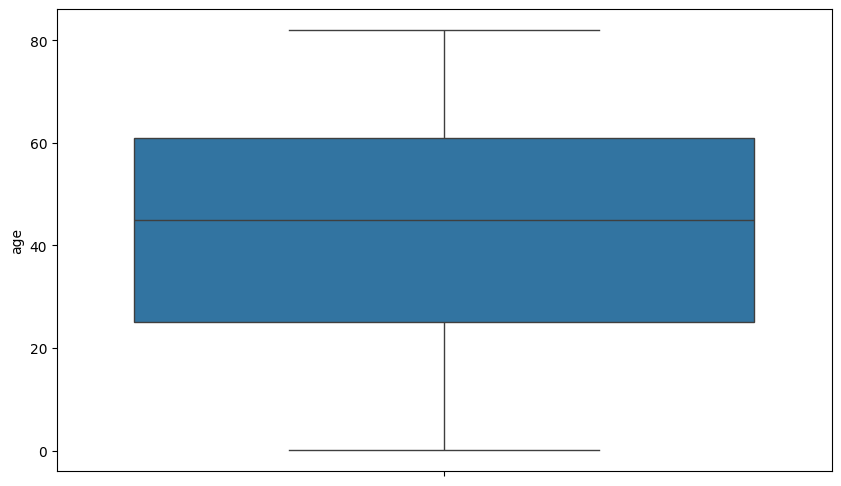

In [83]:
# Create a boxplot of the 'age' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(stroke_df.age)

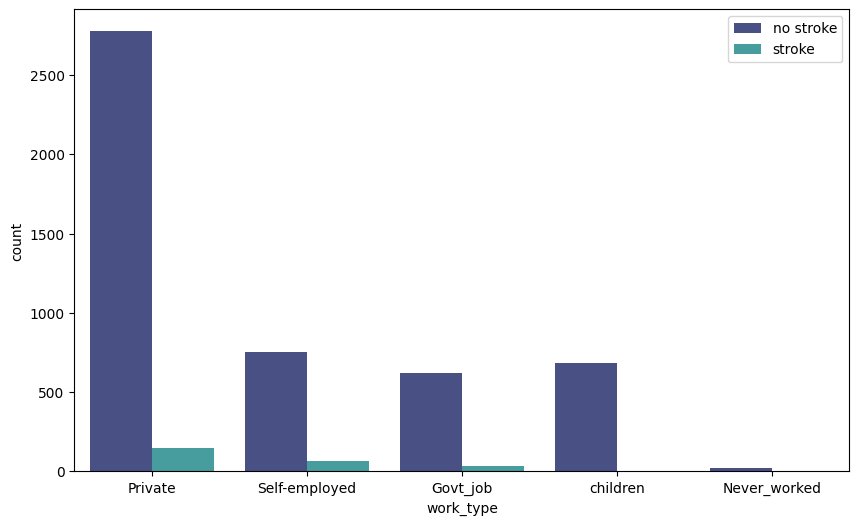

In [132]:
# Create a count plot of the 'work_type' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=stroke_df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

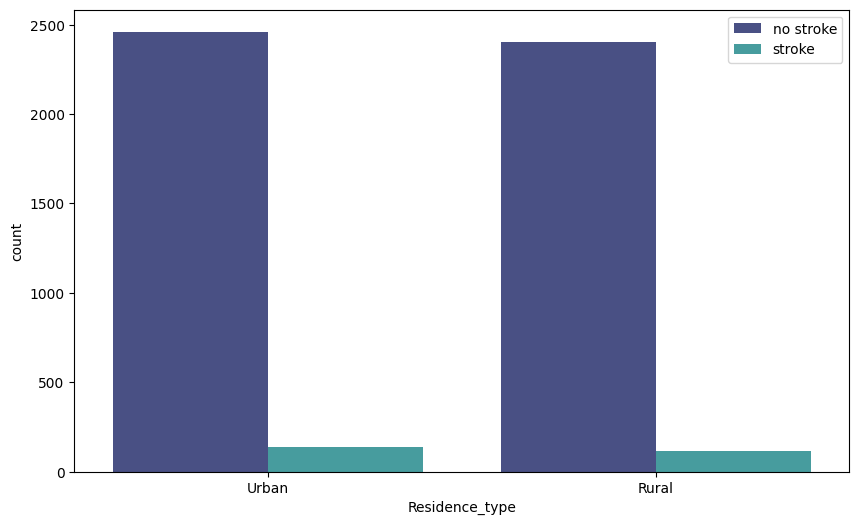

In [133]:
# Create a count plot of the 'Residence_type' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=stroke_df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

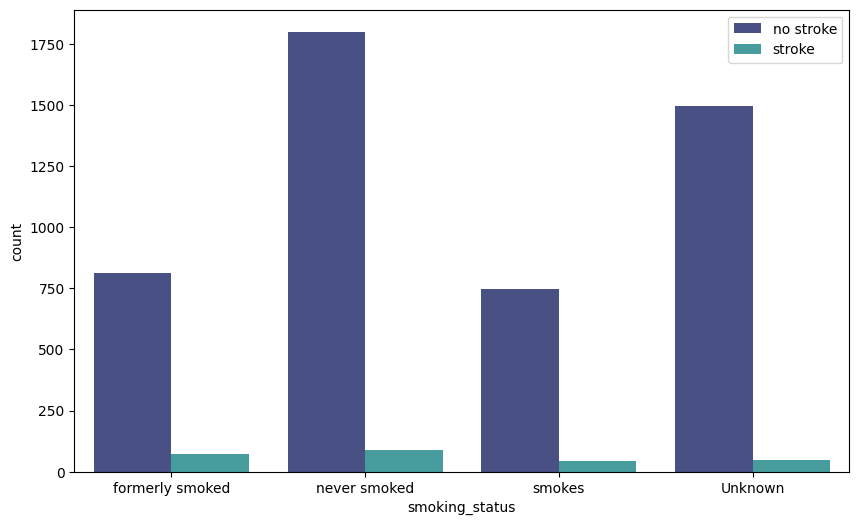

In [134]:
# Create a count plot of the 'smoking_status' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=stroke_df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

<Axes: ylabel='avg_glucose_level'>

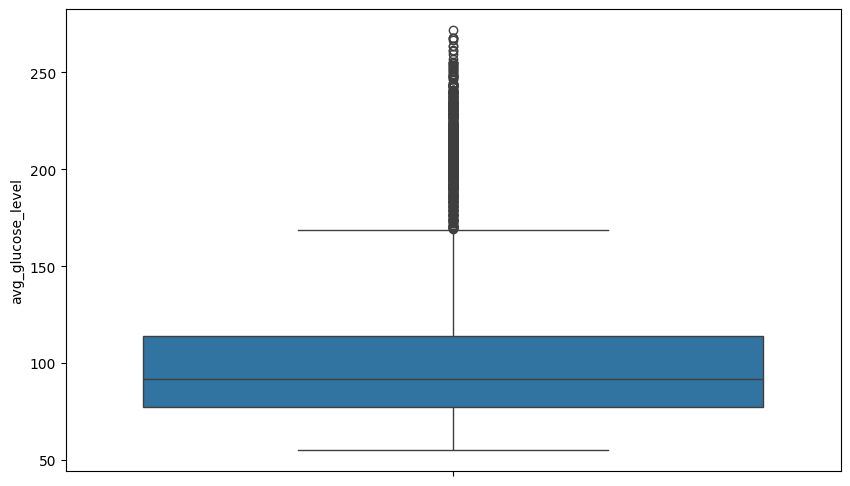

In [84]:
# Create a boxplot of the 'avg_glucose_level' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(stroke_df.avg_glucose_level)

In [85]:
Target = 'stroke'
stroke_df[Target].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

C:\Users\Aish\AppData\Local\Temp\ipykernel_9276\3050293321.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.pie(pd.value_counts(stroke_df['stroke']),


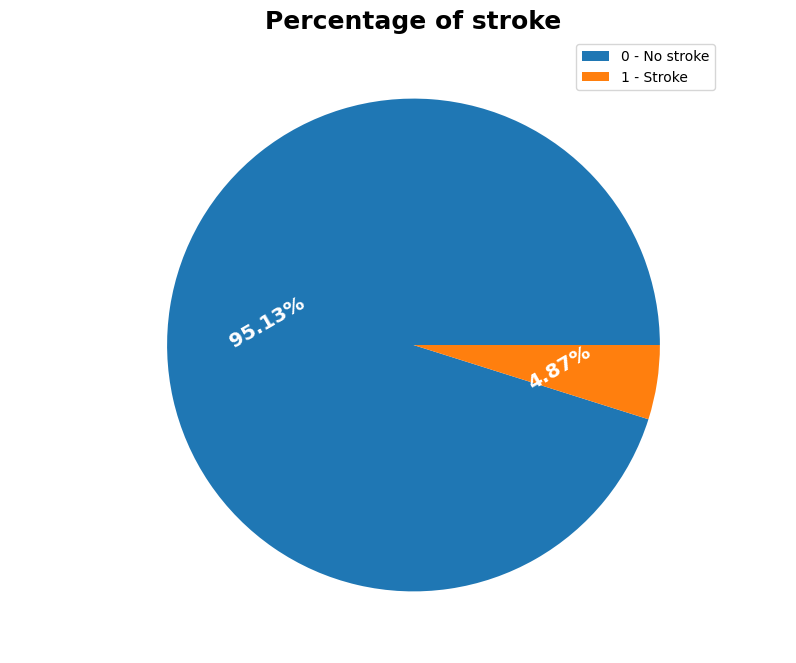

In [86]:
plt.figure(figsize = (8, 8))
plt.pie(pd.value_counts(stroke_df['stroke']), 
        labels = ["0 - No stroke","1 - Stroke"],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : 30,
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of stroke', fontsize = 18, fontweight = 'bold')
plt.show()

TypeError: DataFrame.corr() missing 2 required positional arguments: 'col1' and 'col2'

<Figure size 1000x600 with 0 Axes>

In [87]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [88]:
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [89]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

In [90]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Column Exploration using PySpark

In [91]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, desc, col
from pyspark.sql.functions import max
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import when
from pyspark.sql.functions import col, upper, when

In [92]:
spark = SparkSession.builder.appName("Stroke_prediction").getOrCreate()

In [93]:
stroke_pred_df = spark.read.csv("./Data/healthcare-dataset-stroke-data.csv", header=True, inferSchema=False)

In [94]:
stroke_pred_df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [95]:
stroke_pred_df.show(stroke_pred_df.count())

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|  67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|  61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|  80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|  49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|  79|           1|            0|         

In [96]:
gender_stroke_counts = stroke_pred_df.groupBy('gender', 'stroke').count()

In [97]:
gender_stroke_counts.show()
male_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 1)).select('count').collect()[0][0]
female_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 1)).select('count').collect()[0][0]
male_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 0)).select('count').collect()[0][0]
female_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 0)).select('count').collect()[0][0]
other_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Other') & (col('stroke') == 0)).select('count').collect()[0][0]

print("Male with stroke count:", male_stroke_count)
print("Female with stroke count:", female_stroke_count)
#print("Other with stroke count:", other_stroke_count)

print("Male without stroke count:", male_no_stroke_count)
print("Female without stroke count:", female_no_stroke_count)
print("Other without stroke count:", other_no_stroke_count)


+------+------+-----+
|gender|stroke|count|
+------+------+-----+
|  Male|     1|  108|
|Female|     0| 2853|
| Other|     0|    1|
|  Male|     0| 2007|
|Female|     1|  141|
+------+------+-----+

Male with stroke count: 108
Female with stroke count: 141
Male without stroke count: 2007
Female without stroke count: 2853
Other without stroke count: 1


In [98]:
male_count = gender_stroke_counts.filter((col('gender') == 'Male') | (col('gender') == 'male')).select('count').collect()[0][0]
female_count = gender_stroke_counts.filter((col('gender') == 'Female') | (col('gender') == 'female')).select('count').collect()[0][0]
other_count = gender_stroke_counts.filter((col('gender') == 'Other') | (col('gender') == 'other')).select('count').collect()[0][0]
print("Total Male count:", male_count)
print("Total Female count:", female_count)
print("Other count:", other_count)

Total Male count: 108
Total Female count: 2853
Other count: 1


In [99]:
hypertension_stroke_counts = stroke_pred_df.groupBy('hypertension', 'stroke').count()

In [100]:
hypertension_stroke_counts.show()
whypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Hypertension having stroke:", whypertension_stroke_count)
print("Without Hypertension having stroke:", wohypertension_stroke_count)
print("With Hypertension having no stroke:", whypertension_no_stroke_count)
print("Without Hypertension having no stroke:", wohypertension_no_stroke_count)


+------------+------+-----+
|hypertension|stroke|count|
+------------+------+-----+
|           0|     1|  183|
|           1|     1|   66|
|           0|     0| 4429|
|           1|     0|  432|
+------------+------+-----+

With Hypertension having stroke: 66
Without Hypertension having stroke: 183
With Hypertension having no stroke: 432
Without Hypertension having no stroke: 4429


In [101]:
heartdisease_stroke_counts = stroke_pred_df.groupBy('heart_disease', 'stroke').count()

In [102]:
heartdisease_stroke_counts.show()
whd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Heart disease having stroke:", whd_stroke_count)
print("Without Heart disease having stroke:", wohd_stroke_count)
print("With Heart disease having no stroke:", whd_no_stroke_count)
print("Without Heart disease having no stroke:", wohd_no_stroke_count)

+-------------+------+-----+
|heart_disease|stroke|count|
+-------------+------+-----+
|            1|     1|   47|
|            0|     1|  202|
|            0|     0| 4632|
|            1|     0|  229|
+-------------+------+-----+

With Heart disease having stroke: 47
Without Heart disease having stroke: 202
With Heart disease having no stroke: 229
Without Heart disease having no stroke: 4632


Feature Engineering

Data Preparation

In [103]:
encoder = OneHotEncoder(sparse_output=False)

In [137]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 479.2+ KB


In [105]:
list(stroke_df.dtypes[stroke_df.dtypes == "object"].index)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [106]:
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoded_data = encoder.fit_transform(stroke_df[categorical_variables])

In [107]:
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_variables))

# Display sample data
encoded_df.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [108]:
numerical_variables_df = stroke_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1


In [109]:
stroke_encoded = pd.concat([numerical_variables_df, encoded_df], axis=1)

stroke_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

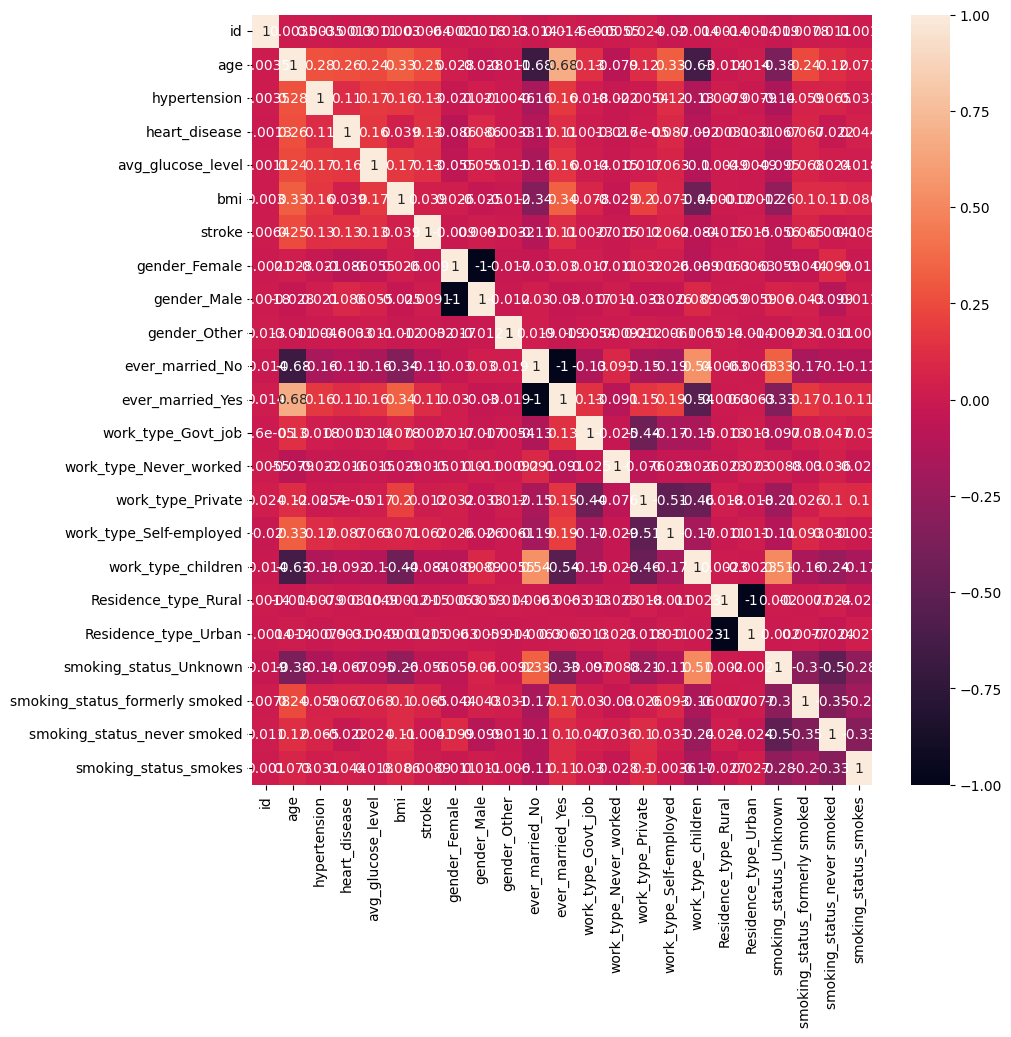

In [110]:
Target = 'stroke'
stroke_encoded[Target].value_counts()

# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


Split the Data

In [111]:
#Seperate target and features data
X = stroke_encoded.drop(columns = "stroke")
y = stroke_encoded["stroke"]

In [112]:

import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

display(y_train.value_counts())

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

stroke
0    1457
1      76
Name: count, dtype: int64

Shape of X: (5110, 22)
Shape of y: (5110,)


In [113]:
# Import necessary modules from imblearn library
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()

# Resample the dataset using SMOTE to handle class imbalance
X_resampled, y_resampled = smote.fit_resample(X, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')

# Resample the dataset using RandomUnderSampler to handle class imbalance
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

In [114]:
# Print the shapes of the resampled datasets
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

# Print the class distributions of the resampled datasets
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

(9722, 22) (9722,)
(9722, 22) (9722,)
(498, 22) (498,)
stroke
1    4861
0    4861
Name: count, dtype: int64
stroke
1    4861
0    4861
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1457
           1       1.00      0.94      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



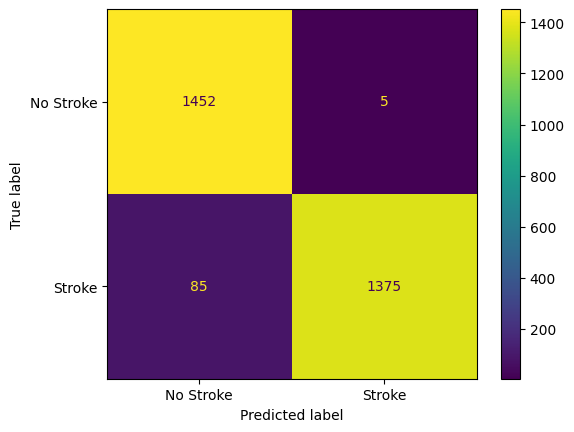

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Split the resampled data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
# Initialize the RandomForestClassifier model with a random state for reproducibility
model = RandomForestClassifier(random_state=42)
# Train the RandomForestClassifier model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

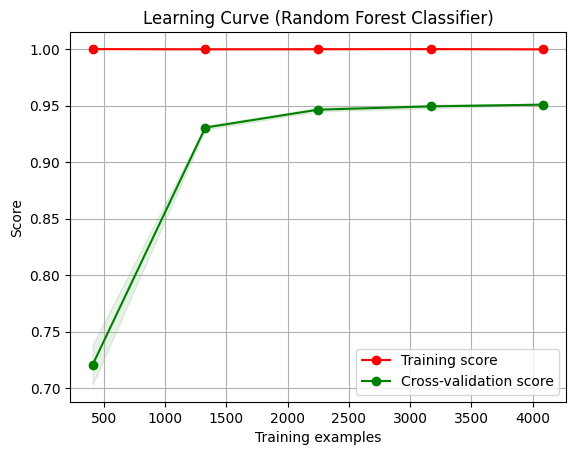

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the learning curve.

    Parameters:
    - estimator: the machine learning model to evaluate
    - title: title for the plot
    - X: input features
    - y: target variable
    - ylim: tuple (min, max) for the y-axis limits
    - cv: number of folds for cross-validation
    - n_jobs: number of parallel jobs to run (-1 uses all processors)
    - train_sizes: array-like, proportions of the dataset to use for training

    Returns:
    - Plot of the learning curve
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [144]:
import joblib
joblib.dump(model, 'Random_forest_classifier_model_new.joblib')


['Random_forest_classifier_model_new.joblib']

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1457
           1       0.76      0.85      0.80      1460

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



c:\Users\Aish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


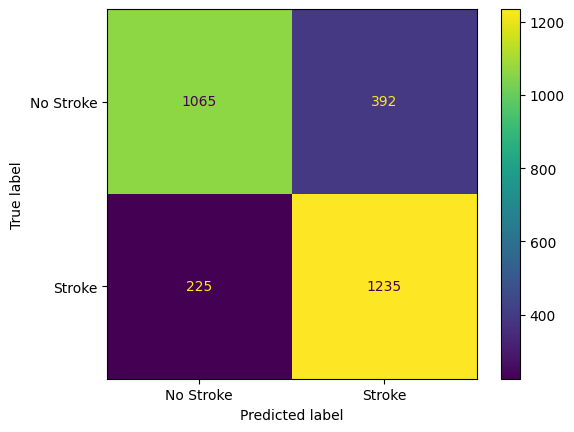

In [150]:
# Import Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the Logistic Regression model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()



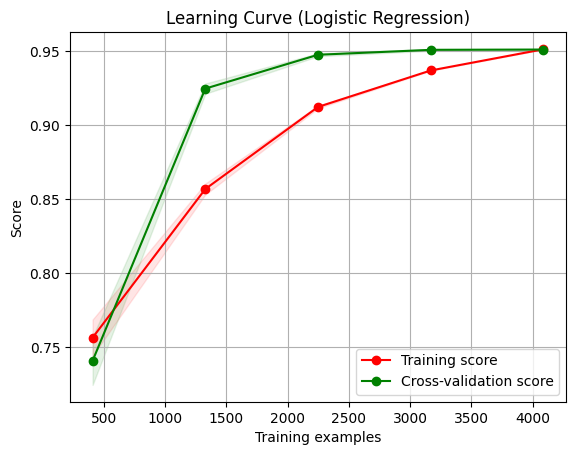

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    """
    Generate a simple plot of the learning curve.

    Parameters:
    - estimator: the machine learning model to evaluate
    - title: title for the plot
    - X: input features
    - y: target variable
    - ylim: tuple (min, max) for the y-axis limits
    - cv: number of folds for cross-validation
    - n_jobs: number of parallel jobs to run (-1 uses all processors)
    - train_sizes: array-like, proportions of the dataset to use for training

    Returns:
    - Plot of the learning curve
    """
    
    plt.figure()
    plt.title(title)

    # Set y-axis limits if provided
    if ylim is not None:
        plt.ylim(*ylim)

    # Set labels for x and y axes
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression model
title = "Learning Curve (Logistic Regression)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [120]:
joblib.dump(model, 'Logistic_regression_model_new.joblib')


['Logistic_regression_model_new.joblib']

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1457
           1       0.92      0.94      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



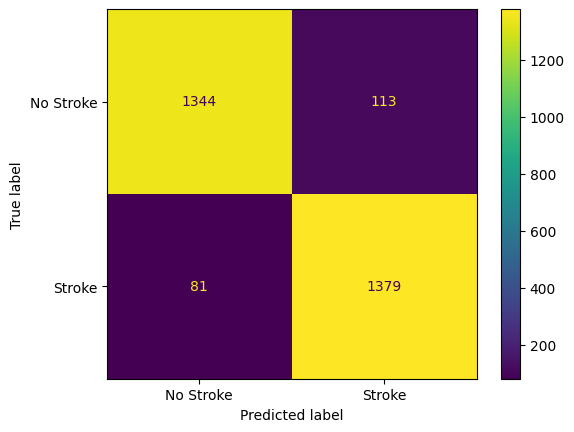

In [121]:
# Import Decision Tree Classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the Decision Tree Classifier model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)

# Print the classification report to evaluate the performance of the Decision Tree Classifier model
print(classification_report(y_test,y_pred))

# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()


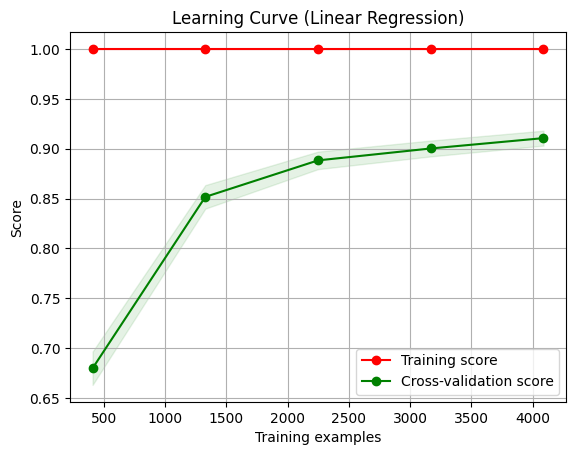

In [122]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression model
title = "Learning Curve (Linear Regression)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [123]:
joblib.dump(model, 'Decision_tree_model_new.joblib')

['Decision_tree_model_new.joblib']

In [124]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3401
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 22)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


In [125]:
scaler_path=os.path.join(r'scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

NameError: name 'scaler' is not defined

In [ ]:
!pip install pywaffle

In [ ]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')


rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [ ]:
X_test_scaled

In [ ]:
X_train.shape


Modeling Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

In [ ]:
train_pred = model_LR.predict(X_train)

In [ ]:
test_pred = model_LR.predict(X_test)

In [ ]:
train_cm = confusion_matrix(y_train, train_pred.round())
train_accuracy = accuracy_score(y_train, train_pred.round())

In [ ]:
test_cm = confusion_matrix(y_test, test_pred.round())
test_accuracy = accuracy_score(y_test, test_pred.round())
test_precision = precision_score(y_test, test_pred.round())

In [ ]:
print("Confusion Matrix for Train Data:")
print(train_cm)
print("Accuracy for Train Data:", train_accuracy)

print("\nConfusion Matrix for Test Data:")
print(test_cm)
print("Accuracy for Test Data:", test_accuracy)
print("Precision for Test Data:", test_precision)

In [ ]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2


In [ ]:
print(adj_r2(X_train, y_train, model_LR))

In [ ]:
print(adj_r2(X_test, y_test, model_LR))

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

In [ ]:

alpha = lasso_cv.alpha_
alpha

In [ ]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
lasso.score(X_test, y_test)

In [ ]:
print(adj_r2(X_train, y_train, lasso))

In [ ]:
print(adj_r2(X_test, y_test, lasso))

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

In [ ]:
alpha = ridge_cv.alpha_
alpha


In [ ]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)